<a href="https://colab.research.google.com/github/snigdha6106/FMML_Projects_and_Labs/blob/main/Cat_vs_Dog_Image_Classifier_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import requests
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
response = requests.get(url)

with open("cats_and_dogs_filtered.zip", "wb") as f:
    f.write(response.content)

with zipfile.ZipFile("cats_and_dogs_filtered.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

train_dir = "cats_and_dogs_filtered/train"
validation_dir = "cats_and_dogs_filtered/validation"


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,936,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,937,409 (15.02 MB)

 Trainable params: 3,937,409 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 258ms/step - accuracy: 0.5273 - loss: 1.3306 - val_accuracy: 0.5600 - val_loss: 0.6638
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.5809 - loss: 0.6694 - val_accuracy: 0.6360 - val_loss: 0.6464
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.6403 - loss: 0.6355 - val_accuracy: 0.5940 - val_loss: 0.6539
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.6795 - loss: 0.6124 - val_accuracy: 0.6720 - val_loss: 0.6139
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.7300 - loss: 0.5643 - val_accuracy: 0.6510 - val_loss: 0.6224
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.7048 - loss: 0.5781 - val_accuracy: 0.6850 - val_loss: 0.6014
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.7079 - loss: 0.5687 - val_accuracy: 0.6850 - val_loss: 0.5902
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.7284 - loss: 0.5566 - val_accu

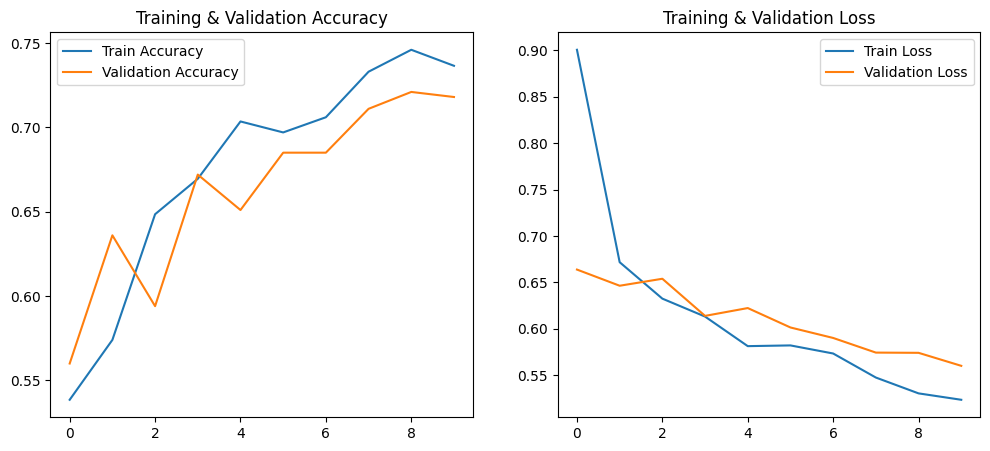

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='binary')

test_set = test_datagen.flow_from_directory(validation_dir,
                                             target_size=(64, 64),
                                             batch_size=32,
                                             class_mode='binary')


history = model.fit(train_set,
                    epochs=10,
                    validation_data=test_set)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()
